https://www.aprendemachinelearning.com/arbol-de-decision-en-python-clasificacion-y-prediccion/

### Obtención de los datos de entrada

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

Análisis Exploratorio Inicial

In [2]:
artists_billboard = pd.read_csv("C:/Users/miguel.postigo/Desktop/carpeta/programacion/python/aprendeML/TODO/artists_billboard_fix3.csv")
df = artists_billboard

In [3]:
df

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
630,630,The Blower's Daughter,MATT McANDREW,Romantic,Medium Tempo,Pop,Male,20141220,881.0,0,1990.0
631,631,First Love,JENNIFER LOPEZ,Peaceful,Slow Tempo,Pop,Female,20140705,238.0,0,1970.0
632,632,No One,ALICIA KEYS,Sophisticated,Slow Tempo,Urban,Female,20071201,157.0,1,1981.0
633,633,She Came To Give It To You,USHER featuring NICKI MINAJ,Energizing,Medium Tempo,Urban,Mixed,20140913,209.0,0,1982.0


In [4]:
df[df["anioNacimiento"]>1999.0 ]

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento


In [5]:
df.shape

(635, 11)

In [6]:
df.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0


### Primero, agrupemos registros para ver cuántos alcanzaron el número uno y cuantos no:

In [7]:
df.groupby('top').head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0
5,5,Where Is At (Yep Yep),DUSTIN LYNCH,Upbeat,Medium Tempo,Traditional,Male,20140531,219.0,0,1990.0
6,6,Single Ladies (Put A Ring On It),BEYONCE,Cool,Slow Tempo,Urban,Female,20081213,43.0,1,1981.0
10,10,Fancy,IGGY AZALEA featuring CHARLI XCX,Energizing,Medium Tempo,Urban,Female,20140607,197.0,1,1974.0
15,15,Teenage Dream,KATY PERRY,Excited,Medium Tempo,Pop,Female,20100918,235.0,1,1984.0
22,22,Don't Forget About Us,MARIAH CAREY,Sensual,Medium Tempo,Urban,Female,20051231,229.0,1,1970.0


In [8]:
df.groupby('top').size()

top
0    494
1    141
dtype: int64

 tenemos una cantidad DESBALANCEADA de etiquetas con 1 y 0. Lo tendremos en cuenta al momento de crear el árbol.

C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


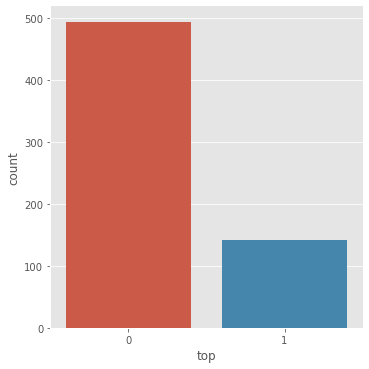

In [9]:
sb.factorplot("top", data = df, kind = "count")

### Veamos cuántos registros hay de tipo de artista, “mood”, tempo y género de las canciones:

C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


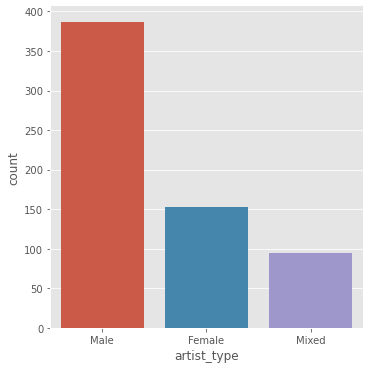

In [10]:
sb.factorplot('artist_type', data = df, kind = "count")

C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


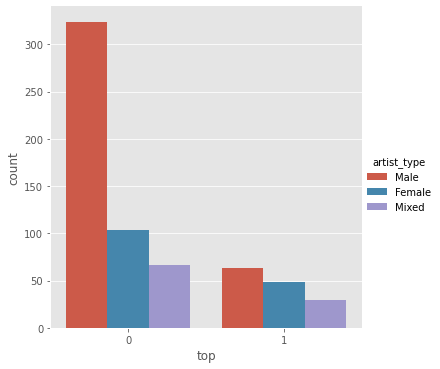

In [11]:
sb.factorplot('top',data=df, hue = 'artist_type', kind = "count")

C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


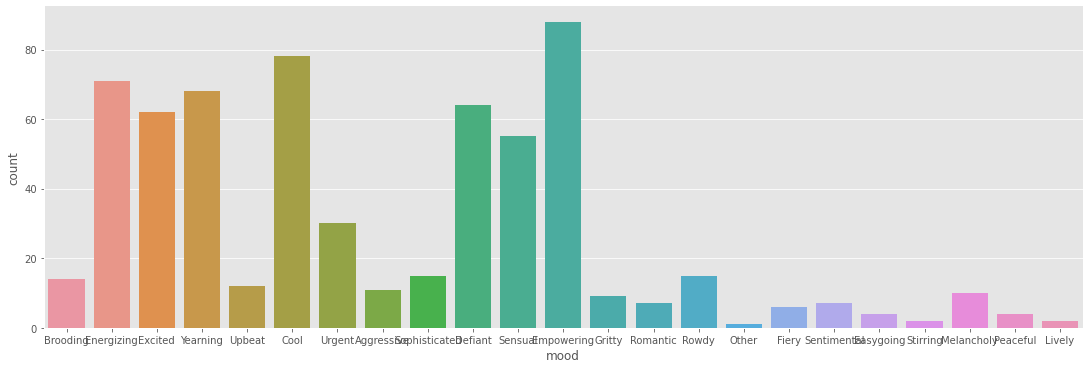

In [12]:
sb.factorplot('mood',data=df,kind="count", 
              aspect=3
             )

C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


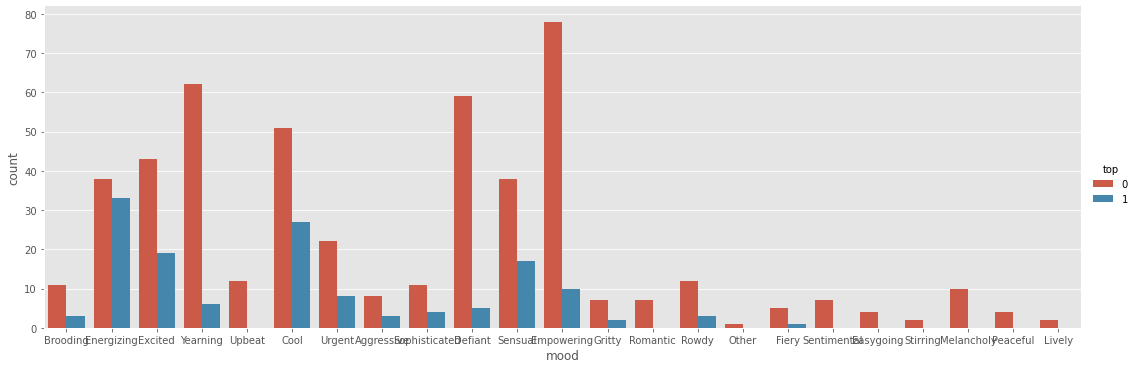

In [13]:
sb.factorplot('mood',data=df,hue='top',kind="count", aspect=3)

C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


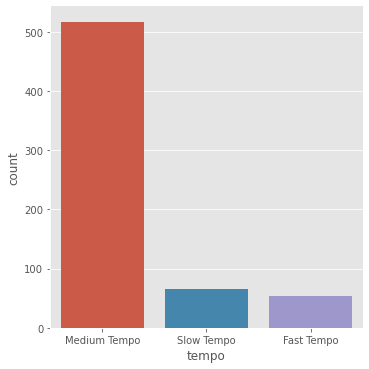

In [14]:
sb.factorplot('tempo',data=df,
              #hue='top',
              kind="count")

C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


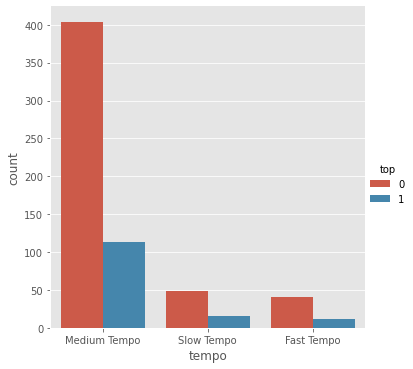

In [15]:
sb.factorplot('tempo',data=df,
              hue='top',
              kind="count")

C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


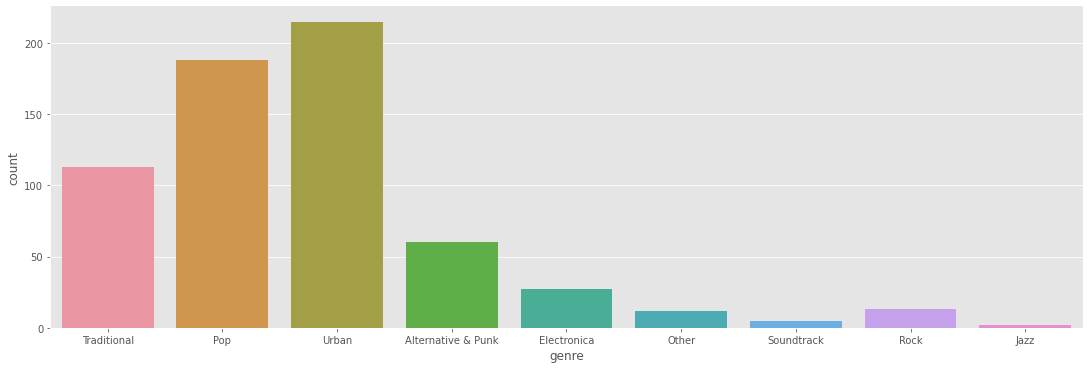

In [16]:
sb.factorplot('genre',data=df,kind="count", aspect=3)

C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


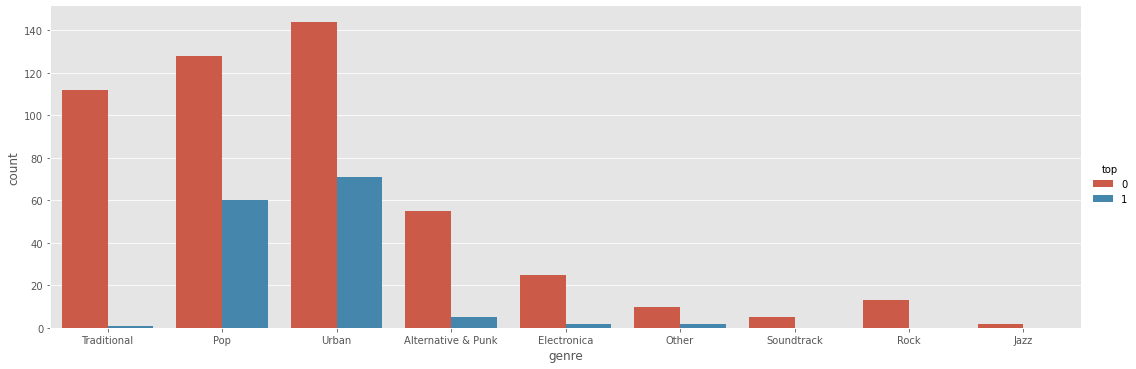

In [17]:
sb.factorplot('genre',data=df,hue = "top",kind="count", aspect=3)

C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


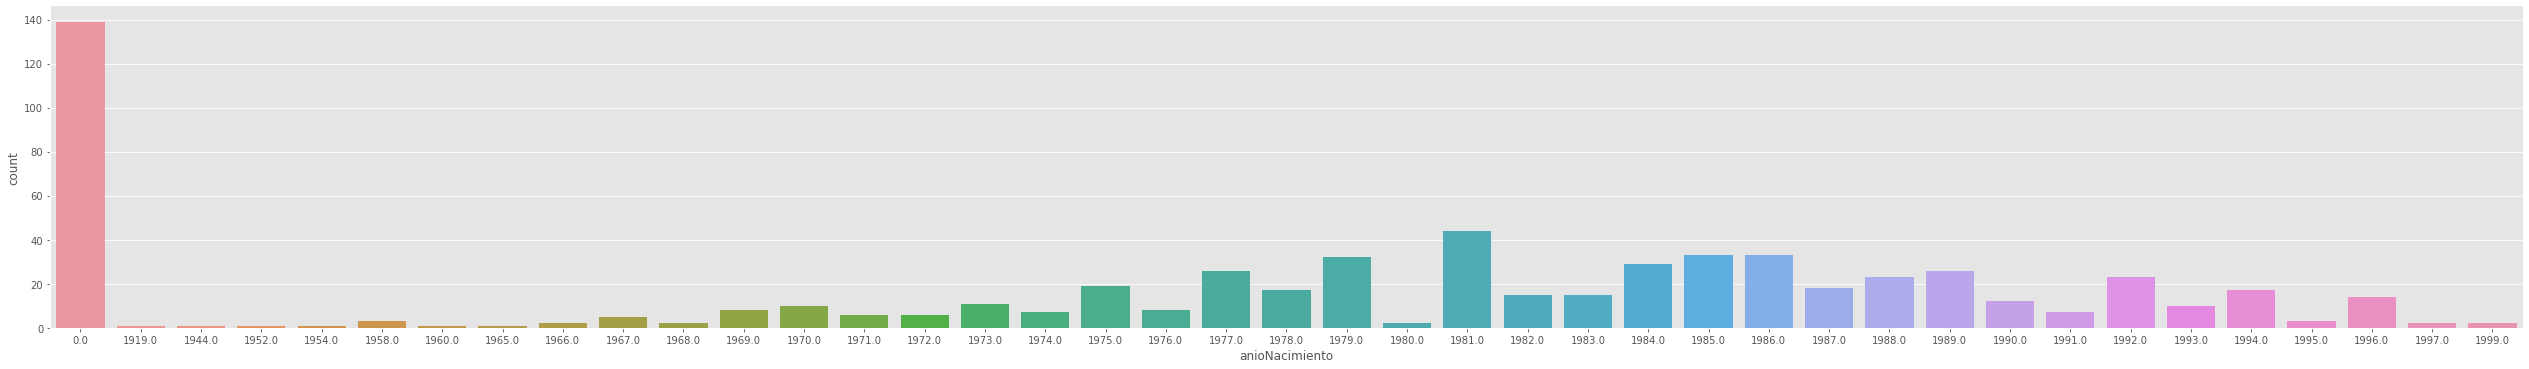

In [18]:
sb.factorplot('anioNacimiento',data=df,
              #hue = "top",
              kind="count", aspect=7)

140 canciones de las cuales desconocemos el año de nacimiento del artista. El resto de años parecen concentrarse entre 1979 y 1994 (a ojo). Más adelante trataremos estos registros.

In [19]:
#df[['anioNacimiento', 'top']].groupby(['anioNacimiento'], as_index=False).agg(['mean', 'count', 'sum'])
nacimientosPorAnio = df['anioNacimiento']
len(nacimientosPorAnio[nacimientosPorAnio<=0])

139

In [20]:
df3 = df.groupby(by = ['anioNacimiento'])['top'].describe()
df3
#[]

,count,mean,std,min,25%,50%,75%,max
anioNacimiento,,,,,,,,
0.0,139.0,0.007194,0.084819,0.0,0.00,0.0,0.00,1.0
1919.0,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
1944.0,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
1952.0,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
1954.0,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
1958.0,3.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
1960.0,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
1965.0,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
1966.0,2.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [21]:
df2 = df[['anioNacimiento', 'top']].groupby(['anioNacimiento'], as_index=False).agg(['mean', 'count', 'sum'])

In [22]:
df2

top          
                    mean count sum
anioNacimiento                    
0.0             0.007194   139   1
1919.0          0.000000     1   0
1944.0          0.000000     1   0
1952.0          0.000000     1   0
1954.0          0.000000     1   0
1958.0          0.000000     3   0
1960.0          0.000000     1   0
1965.0          0.000000     1   0
1966.0          0.000000     2   0
1967.0          0.000000     5   0
1968.0          0.000000     2   0
1969.0          0.125000     8   1
1970.0          0.600000    10   6
1971.0          0.166667     6   1
1972.0          0.333333     6   2
1973.0          0.454545    11   5
1974.0          0.714286     7   5
1975.0          0.526316    19  10
1976.0          0.125000     8   1
1977.0          0.230769    26   6
1978.0          0.470588    17   8
1979.0          0.281250    32   9
1980.0          0.500000     2   1
1981.0          0.409091    44  18
1982.0          0.266667    15   4
1983.0          0.266667    15   4
1984.0          0.379310    29  11
1985.0          0.333333    33  11
1986.0          0.151515    33   5
1987.0          0.222222    18   4
1988.0          0.608696    23  14
1989.0          0.307692    26   8
1990.0          0.166667    12   2
1991.0          0.000000     7   0
1992.0          0.043478    23   1
1993.0          0.200000    10   2
1994.0          0.000000    17   0
1995.0          0.000000     3   0
1996.0          0.071429    14   1
1997.0          0.000000     2   0
1999.0          0.000000     2   0

In [23]:
len(df2.top["mean"])

41

In [24]:
df2.top["mean"].max()

0.7142857142857143

In [25]:
df2.top.describe()

,mean,count,sum
count,41.000000,41.000000,41.000000
mean,0.194188,15.487805,3.439024
std,0.209679,22.702557,4.472409
min,0.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000
50%,0.151515,10.000000,1.000000
75%,0.333333,19.000000,5.000000
max,0.714286,139.000000,18.000000


In [26]:
df2.top["count"].sum()

635

### Balanceo de Datos: Pocos artistas llegan al número uno

Como dijimos antes, no tenemos “equilibrio” en la cantidad de etiquetas top y “no-top” de las canciones. Esto se debe a que en el transcurso de un año, apenas unas 5 o 6 canciones logran el primer puesto y se mantienen durante varias semanas en ese puesto. Cuando inicialmente extraje las canciones, utilicé 2014 y 2015 y tenía apenas a 11 canciones en el top de Billboard y 494 que no llegaron.
Para intentar equilibrar los casos positivos agregué solamente los TOP de los años 2004 al 2013. Con eso conseguí los valores que tenemos en el archivo csv: son 494 “no-top” y 141 top. A pesar de esto sigue estando desbalanceado, y podríamos seguir agregando sólo canciones TOP de años previos, pero utilizaremos un parámetro (class_weight) del algoritmo de árbol de decisión para compensar esta diferencia.

## Comparemos los Top y los No-top

#### Buscamos si hay alguna relación evidente entre Año y duración de Canción

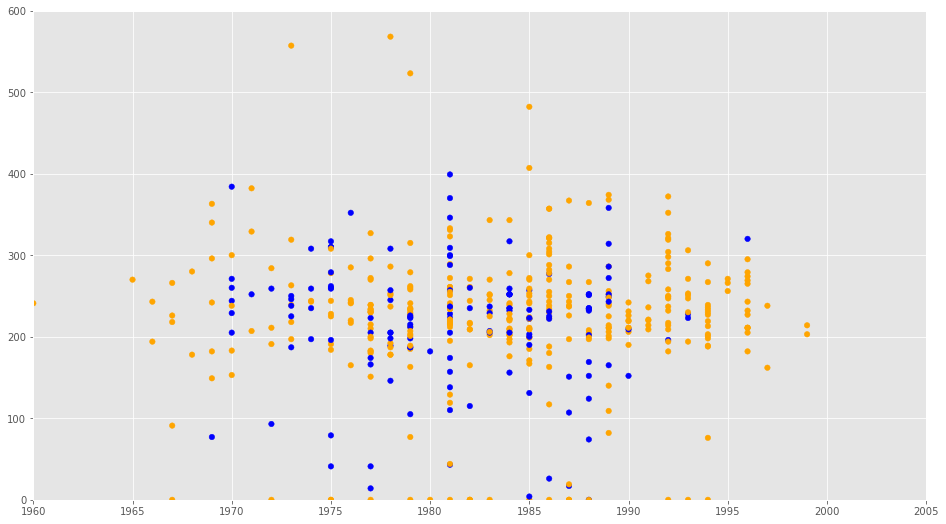

In [27]:
colores=['orange','blue']
tamanios=[60,40]

f1 = df['anioNacimiento'].values
f2 = df['durationSeg'].values

asignar=[]
for index, row in df.iterrows():    
    asignar.append(colores[row['top']])

plt.scatter(f1, f2, c=asignar, s=30)
plt.axis([1960,2005,0,600])
plt.show()

veamos en que años tenemos Top
Visualicemos los top y no top de acuerdo a sus fechas en los Charts:

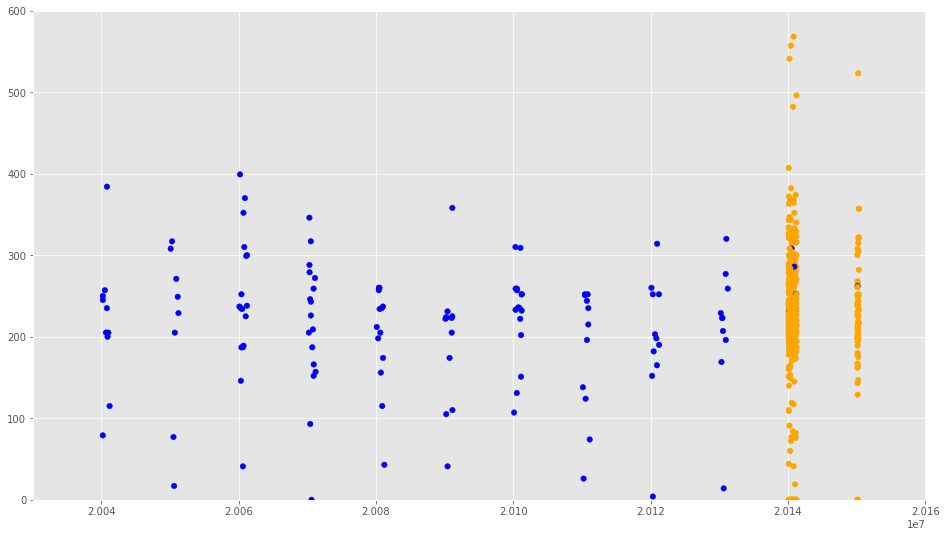

In [28]:
f1 = df['chart_date'].values
f2 = df['durationSeg'].values

asignar=[]
asignar2=[]
for index, row in df.iterrows():    
    asignar.append(colores[row['top']])
    asignar2.append(tamanios[row['top']])

plt.scatter(f1, f2, c=asignar, s=30)
plt.axis([20030101,20160101,0,600])
plt.show()

## Preparamos los datos

Vamos a arreglar el problema de los años de nacimiento que están en cero. Realmente el “feature” o característica que queremos obtener es : “sabiendo el año de nacimiento del cantante, calcular qué edad tenía al momento de aparecer en el Billboard”. Por ejemplo un artista que nació en 1982 y apareció en los charts en 2012, tenía 30 años.

Primero vamos a sustituir los ceros de la columna “anioNacimiento”por el valor None -que es es nulo en Python-.

In [29]:
df.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0


In [30]:
def edad_fix(anio):
    if anio==0:
        return None
    return anio

df['anioNacimiento'] = df.apply(lambda x: edad_fix(x['anioNacimiento']), axis=1)
df.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN


Luego vamos a calcular las edades en una nueva columna “edad_en_billboard” restando el año de aparición (los 4 primeros caracteres de chart_date) al año de nacimiento. En las filas que estaba el año en None, tendremos como resultado edad None.

In [31]:
def calcula_edad(anio,cuando):
    cad = str(cuando)
    momento = cad[:4]
    if anio==0.0:
        return None
    return int(momento) - anio
#creamos la columna
df['edad_en_billboard'] = df.apply(lambda x: calcula_edad(x['anioNacimiento'],x['chart_date']), axis=1);
df.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento,edad_en_billboard
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0,39.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0,25.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0,21.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0,25.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN,NaN


In [32]:
df['edad_en_billboard'].describe()

count    496.000000
mean      30.102823
std        8.400788
min       15.000000
25%       24.000000
50%       29.000000
75%       35.000000
max       95.000000
Name: edad_en_billboard, dtype: float64

In [33]:
df[df['edad_en_billboard'] == 15.0]

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento,edad_en_billboard
169,169,Life Of The Party,SHAWN MENDES,Empowering,Medium Tempo,Pop,Male,20140712,203.0,0,1999.0,15.0
491,491,Something Big,SHAWN MENDES,Defiant,Medium Tempo,Pop,Male,20141122,214.0,0,1999.0,15.0


In [34]:
df[df['edad_en_billboard'] == 95.0]

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento,edad_en_billboard
494,494,The Christmas Song (Merry Christmas To You),NAT KING COLE,Romantic,Medium Tempo,Pop,Male,20140104,178.0,0,1919.0,95.0


Y finalmente asignaremos edades aleatorias a los registros faltantes: 
para ello, obtenemos el promedio de edad de nuestro conjunto (avg) y su desvío estándar (std) -por eso necesitábamos las edades en None- y pedimos valores random a la función que van desde avg – std hasta avg + std. En nuestro caso son edades de entre 21 a 37 años.

In [35]:
age_avg = df['edad_en_billboard'].mean() #la media/average
age_std = df['edad_en_billboard'].std() #la desviación estandar
#contamos el numero de valores nulos en la columna
age_null_count = df['edad_en_billboard'].isnull().sum()
#generamos una lista de valores entre la media y la desviación estandar +-, con el tamaño del nº de valores nulos que había
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

conValoresNulos = np.isnan(df['edad_en_billboard']) #array con los valores nulos
#cambiamos esos valores nulos, por los valores de la lista que hemos creado
df.loc[np.isnan(df['edad_en_billboard']), 'edad_en_billboard'] = age_null_random_list

df['edad_en_billboard'] = df['edad_en_billboard'].astype(int) #queremos la edad en tipo entero
print("Edad Promedio: " + str(age_avg))
print("Desvió Std Edad: " + str(age_std))
print("Intervalo para asignar edad aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))
df.head()

Edad Promedio: 30.10282258064516
Desvió Std Edad: 8.40078832861513
Intervalo para asignar edad aleatoria: 21 a 38


,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento,edad_en_billboard
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0,39
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0,25
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0,21
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0,25
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN,27


Si bien lo ideal es contar con la información real, y de hecho la podemos obtener buscando en Wikipedia (o en otras webs de música), quise mostrar otra vía para poder completar datos faltantes manteniendo los promedios de edades que teníamos en nuestro conjunto de datos.

Podemos visualizar los valores que agregamos (en color verde) en el siguiente gráfico:

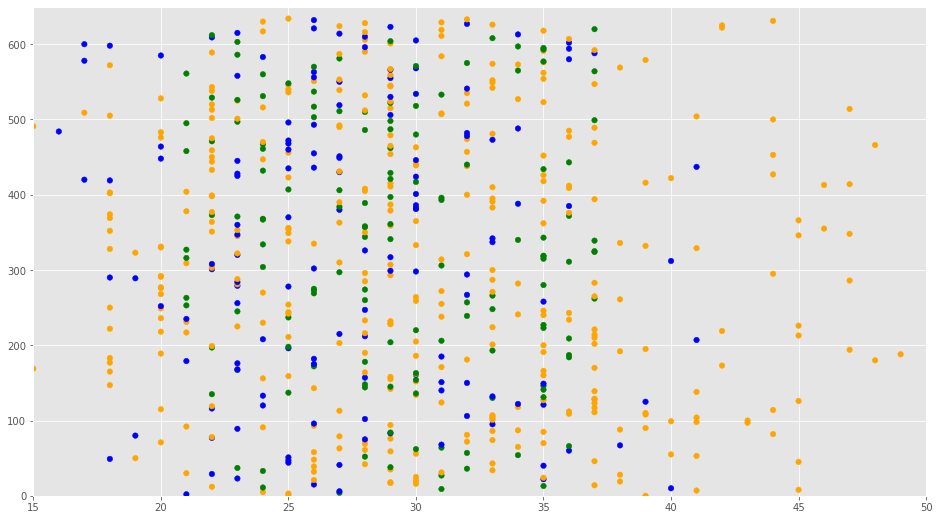

In [36]:
f1 = df['edad_en_billboard'].values
f2 = df.index

colores = ['orange','blue','green']

asignar=[]
for index, row in df.iterrows():    
    if (conValoresNulos[index]):
        asignar.append(colores[2]) # verde
    else:
        asignar.append(colores[row['top']])

plt.scatter(f1, f2, c=asignar, s=30)
plt.axis([15,50,0,650])
plt.show()

## mapeo de datos

Realizaremos un mapeo de los atributos de entrada para poder transformarlos a categorias que podamos utilizar en nuestro árbol de decisión

Vamos a transformar varios de los datos de entrada en valores categóricos. Las edades, las separamos en: menor de 21 años, entre 21 y 26, etc...
las duraciones de canciones también, por ej. entre 150 y 180 segundos, etc. Para los estados de ánimo (mood) agrupé los que eran similares.

El Tempo que puede ser lento, medio o rápido queda mapeado: 0-Rapido, 1-Lento, 2-Medio (por cantidad de canciones en cada tempo: el Medio es el que más tiene)

In [37]:
grouped11 = df.groupby('mood')
grouped11.size()

mood
Aggressive       11
Brooding         14
Cool             78
Defiant          64
Easygoing         4
Empowering       88
Energizing       71
Excited          62
Fiery             6
Gritty            9
Lively            2
Melancholy       10
Other             1
Peaceful          4
Romantic          7
Rowdy            15
Sensual          55
Sentimental       7
Sophisticated    15
Stirring          2
Upbeat           12
Urgent           30
Yearning         68
dtype: int64

In [38]:
separador = "### ### ###"
grouped11 = df.groupby('mood').size()#.sum().reset_index()
#ordeno los resultados de mayor a menor
neworder11 = grouped11.sort_values(ascending=False)
print(neworder11)
print(separador)
print("Tempos de Canción: " + str(df['tempo'].unique()))
print(separador)
print("Tipos de Artista: " + str(df['artist_type'].unique()))
print(separador)
grouped11 = df.groupby('genre').size()#.sum().reset_index()
#ordeno los resultados de mayor a menor
neworder11 = grouped11.sort_values(ascending=False)
print(neworder11)

mood
Empowering       88
Cool             78
Energizing       71
Yearning         68
Defiant          64
Excited          62
Sensual          55
Urgent           30
Sophisticated    15
Rowdy            15
Brooding         14
Upbeat           12
Aggressive       11
Melancholy       10
Gritty            9
Romantic          7
Sentimental       7
Fiery             6
Peaceful          4
Easygoing         4
Lively            2
Stirring          2
Other             1
dtype: int64
### ### ###
Tempos de Canción: ['Medium Tempo' 'Slow Tempo' 'Fast Tempo']
### ### ###
Tipos de Artista: ['Male' 'Female' 'Mixed']
### ### ###
genre
Urban                 215
Pop                   188
Traditional           113
Alternative & Punk     60
Electronica            27
Rock                   13
Other                  12
Soundtrack              5
Jazz                    2
dtype: int64


In [39]:
# Mood Mapping 
df['moodEncoded'] = df['mood'].map( {'Energizing': 6, 
                                        'Empowering': 6,
                                        'Cool': 5, 
                                        'Yearning': 4, # anhelo, deseo, ansia
                                        'Excited': 5, #emocionado
                                        'Defiant': 3, 
                                        'Sensual': 2, 
                                        'Gritty': 3, #coraje 
                                        'Sophisticated': 4,
                                        'Aggressive': 4, # provocativo
                                        'Fiery': 4, #caracter fuerte
                                        'Urgent': 3, 
                                        'Rowdy': 4, #ruidoso alboroto
                                        'Sentimental': 4,
                                        'Easygoing': 1, # sencillo
                                        'Melancholy': 4, 
                                        'Romantic': 2, 
                                        'Peaceful': 1, 
                                        'Brooding': 4, # melancolico
                                        'Upbeat': 5, #optimista alegre
                                        'Stirring': 5, #emocionante
                                        'Lively': 5, #animado
                                        'Other': 0,'':0} ).astype(int)
# Tempo Mapping 
df['tempoEncoded'] = df['tempo'].map( {'Fast Tempo': 0, 'Medium Tempo': 2, 'Slow Tempo': 1, '': 0} ).astype(int)
# Genre Mapping 
df['genreEncoded'] = df['genre'].map( {'Urban': 4, 
                                          'Pop': 3, 
                                          'Traditional': 2, 
                                          'Alternative & Punk': 1,
                                         'Electronica': 1, 
                                          'Rock': 1, 
                                          'Soundtrack': 0, 
                                          'Jazz': 0,
                                          'Other':0,'':0} 
                                       ).astype(int)
# artist_type Mapping 
df['artist_typeEncoded'] = df['artist_type'].map( {'Female': 2, 'Male': 3, 'Mixed': 1, '': 0} ).astype(int)


# Mapping edad en la que llegaron al billboard
df.loc[ df['edad_en_billboard'] <= 21, 'edadEncoded'] 					       = 0
df.loc[(df['edad_en_billboard'] > 21) & (df['edad_en_billboard'] <= 26), 'edadEncoded'] = 1
df.loc[(df['edad_en_billboard'] > 26) & (df['edad_en_billboard'] <= 30), 'edadEncoded'] = 2
df.loc[(df['edad_en_billboard'] > 30) & (df['edad_en_billboard'] <= 40), 'edadEncoded'] = 3
df.loc[ df['edad_en_billboard'] > 40, 'edadEncoded'] = 4
df['edadEncoded'] = df['edadEncoded'].astype(int)

# Mapping Song Duration
df.loc[ df['durationSeg'] <= 150, 'durationEncoded'] 					       = 0
df.loc[(df['durationSeg'] > 150) & (df['durationSeg'] <= 180), 'durationEncoded'] = 1
df.loc[(df['durationSeg'] > 180) & (df['durationSeg'] <= 210), 'durationEncoded'] = 2
df.loc[(df['durationSeg'] > 210) & (df['durationSeg'] <= 240), 'durationEncoded'] = 3
df.loc[(df['durationSeg'] > 240) & (df['durationSeg'] <= 270), 'durationEncoded'] = 4
df.loc[(df['durationSeg'] > 270) & (df['durationSeg'] <= 300), 'durationEncoded'] = 5
df.loc[ df['durationSeg'] > 300, 'durationEncoded'] = 6
df['durationEncoded'] = df['durationEncoded'].astype(int)

In [40]:
df

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento,edad_en_billboard,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0,39,4,2,2,3,3,2
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0,25,6,2,3,2,1,6
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0,21,5,2,4,1,0,3
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0,25,4,2,1,3,1,2
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN,27,4,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,630,The Blower's Daughter,MATT McANDREW,Romantic,Medium Tempo,Pop,Male,20141220,881.0,0,1990.0,24,2,2,3,3,1,6
631,631,First Love,JENNIFER LOPEZ,Peaceful,Slow Tempo,Pop,Female,20140705,238.0,0,1970.0,44,1,1,3,2,4,3
632,632,No One,ALICIA KEYS,Sophisticated,Slow Tempo,Urban,Female,20071201,157.0,1,1981.0,26,4,1,4,2,1,1
633,633,She Came To Give It To You,USHER featuring NICKI MINAJ,Energizing,Medium Tempo,Urban,Mixed,20140913,209.0,0,1982.0,32,6,2,4,1,3,2


Finalmente obtenemos un nuevo conjunto de datos/dataframe llamado *artists_encoded* con el que tenemos los atributos definitivos para crear nuestro árbol. Para ello, quitamos todas las columnas que no necesitamos con “drop”:

In [41]:
drop_elements = ['id','title','artist','mood','tempo','genre','artist_type','chart_date','anioNacimiento','durationSeg','edad_en_billboard']
artists_encoded = df.drop(drop_elements, axis = 1)
artists_encoded

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
0,0,4,2,2,3,3,2
1,0,6,2,3,2,1,6
2,1,5,2,4,1,0,3
3,0,4,2,1,3,1,2
4,0,4,2,2,2,2,3
...,...,...,...,...,...,...,...
630,0,2,2,3,3,1,6
631,0,1,1,3,2,4,3
632,1,4,1,4,2,1,1
633,0,6,2,4,1,3,2


## Analizamos nuestros datos de Entrada Categóricos
Como quedan los top en relación a los datos mapeados

In [42]:
artists_encoded.head()

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
0,0,4,2,2,3,3,2
1,0,6,2,3,2,1,6
2,1,5,2,4,1,0,3
3,0,4,2,1,3,1,2
4,0,4,2,2,2,2,3


In [43]:
artists_encoded.describe()

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,0.222047,4.344882,1.730709,2.755906,2.459843,2.028346,3.179528
std,0.415950,1.350003,0.603553,1.165463,0.740583,1.136913,1.775017
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,0.000000,4.000000,2.000000,3.000000,3.000000,2.000000,3.000000
75%,0.000000,5.500000,2.000000,4.000000,3.000000,3.000000,4.000000
max,1.000000,6.000000,2.000000,4.000000,3.000000,4.000000,6.000000


vemos que está tratando a nuestros datos como números, por eso la media y std son float

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

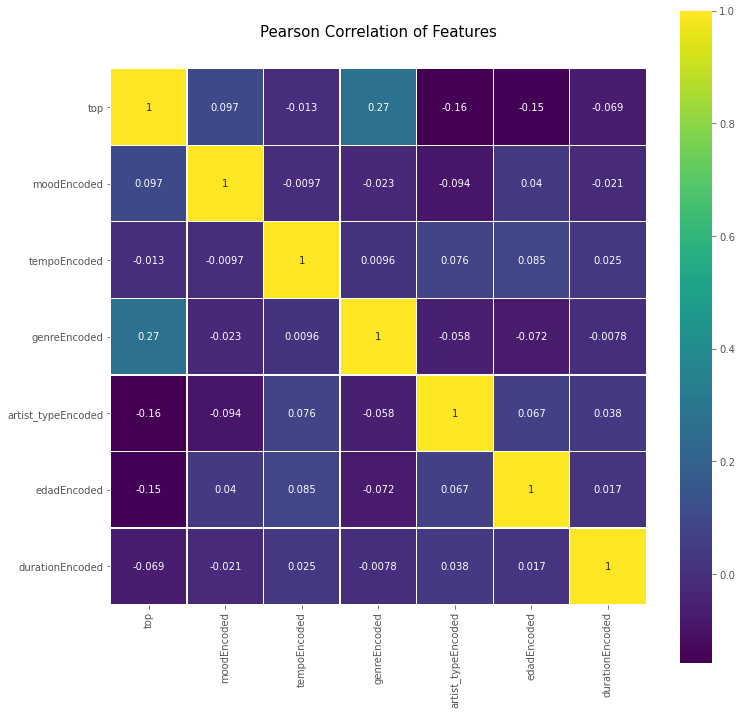

In [44]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(artists_encoded.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

#### Revisemos en tablas cómo se reparten los top=1 en los diversos atributos mapeados. 
Sobre la columna sum, estarán los top, pues al ser valor 0 o 1, sólo se sumarán los que sí llegaron al número 1.

In [45]:
artists_encoded[['moodEncoded', 'top']].groupby(['moodEncoded'], as_index = False).agg(['mean', 'count', 'sum'])

top          
                 mean count sum
moodEncoded                    
0            0.000000     1   0
1            0.000000     8   0
2            0.274194    62  17
3            0.145631   103  15
4            0.136986   146  20
5            0.294872   156  46
6            0.270440   159  43

La mayoría de top 1 los vemos en los estados de ánimo 5 y 6 con 46 y 43 canciones

In [46]:
artists_encoded[['artist_typeEncoded', 'top']].groupby(['artist_typeEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top          
                        mean count sum
artist_typeEncoded                    
1                   0.305263    95  29
2                   0.320261   153  49
3                   0.162791   387  63

Aqui están bastante repartidos, pero hay mayoría en tipo 3: artistas masculinos

In [47]:
artists_encoded[['genreEncoded', 'top']].groupby(['genreEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top          
                  mean count sum
genreEncoded                    
0             0.105263    19   2
1             0.070000   100   7
2             0.008850   113   1
3             0.319149   188  60
4             0.330233   215  71

Los géneros con mayoría son evidentemente los géneros 3 y 4 que corresponden con Urbano y Pop

In [48]:
artists_encoded[['tempoEncoded', 'top']].groupby(['tempoEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top           
                  mean count  sum
tempoEncoded                     
0             0.226415    53   12
1             0.246154    65   16
2             0.218569   517  113

El tempo con más canciones exitosas en el número 1 es el 2, tempo medio

In [49]:
artists_encoded[['durationEncoded', 'top']].groupby(['durationEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top          
                     mean count sum
durationEncoded                    
0                0.295775    71  21
1                0.333333    30  10
2                0.212963   108  23
3                0.202381   168  34
4                0.232143   112  26
5                0.145455    55   8
6                0.208791    91  19

Están bastante repartidos en relación a la duración de las canciones

In [50]:
artists_encoded[['edadEncoded', 'top']].groupby(['edadEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

top          
                 mean count sum
edadEncoded                    
0            0.253731    67  17
1            0.313725   153  48
2            0.235669   157  37
3            0.175355   211  37
4            0.042553    47   2

Edad con mayoría es la tipo 1 que comprende de 21 a 25 años.

## Creamos el árbol y lo tuneamos

#### Buscamos la profundidad para nuestro árbol de decisión
Ya casi tenemos nuestro árbol. Antes de crearlo, vamos a buscar cuántos niveles de profundidad le asignaremos. Para ello, aprovecharemos la función de 
KFold 
que nos ayudará a crear varios subgrupos con nuestros datos de entrada para validar y valorar los árboles con diversos niveles de profundidad. De entre ellos, escogeremos el de mejor resultado.

Para crear el árbol utilizamos de la librería de sklearn tree.DecisionTreeClasifier pues buscamos un árbol de clasificación (no de Regresión). Lo configuramos con los parámetros:

- criterion=entropy ó podría ser gini, pero utilizamos entradas categóricas
- min_samples_split=20 se refiere a la cantidad mínima de muestras que debe tener un nodo para poder subdividir.
- min_samples_leaf=5 cantidad mínima que puede tener una hoja final. Si tuviera menos, no se formaría esa hoja y “subiría” un nivel, su antecesor.
- class_weight={1:3.5} IMPORTANTíSIMO: con esto compensamos los desbalances que hubiera. En nuestro caso, como venía diciendo anteriormente, tenemos menos etiquetas de tipo top=1 (los artistas que llegaron al número 1 del ranking). Por lo tanto, le asignamos 3.5 de peso a la etiqueta 1 para compensar. El valor sale de dividir la cantidad de top=0 (son 494) con los top=1 (son 141).

NOTA: estos valores asignados a los parámetros fueron puestos luego de prueba y error (muchas veces visualizando el árbol, en el siguiente paso y retrocediendo a este).

In [51]:
list(artists_encoded)

['top',
 'moodEncoded',
 'tempoEncoded',
 'genreEncoded',
 'artist_typeEncoded',
 'edadEncoded',
 'durationEncoded']

In [52]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos

accuracies = list()
max_attributes = len(list(artists_encoded)) #nº de columnas del dataframe artists_encoded

depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(artists_encoded):
        f_train = artists_encoded.loc[train_fold] 
        f_valid = artists_encoded.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['top'], axis=1), 
                               y = f_train["top"]) 
        valid_acc = model.score(X = f_valid.drop(['top'], axis=1), 
                                y = f_valid["top"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.556101
         2          0.556126
         3          0.564038
         4          0.656721
         5          0.606473
         6          0.623735
         7          0.650397


## creamos el árbol de decision

In [53]:

# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = artists_encoded['top']
x_train = artists_encoded.drop(['top'], axis=1).values 

# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(artists_encoded.drop(['top'], axis=1)),
                              class_names = ['No', 'N1 Billboard'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado